<a href="https://colab.research.google.com/github/AkliYalaoui/Deceptive-Opinion-Spam-Classification/blob/main/Attention_based_Bidirectional_LSTM_for_Deceptive_Opinion_Spam_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook consolidates code obtained from GitHub, where we diligently addressed all identified bugs and errors. Through this meticulous debugging process, we established a robust foundation for conducting thorough critical analysis and hypothesis testing

# 1. Data preprocessing



In [1]:
import numpy as np
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn import preprocessing

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
df = pd.read_csv('deceptive-opinion.csv')

In [4]:
df.head(5)

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   deceptive  1600 non-null   object
 1   hotel      1600 non-null   object
 2   polarity   1600 non-null   object
 3   source     1600 non-null   object
 4   text       1600 non-null   object
dtypes: object(5)
memory usage: 62.6+ KB


In [6]:
df = df.drop(["hotel", "polarity","source"], axis=1)
df = df.sample(frac=1)
df.head()

,deceptive,text
1362,deceptive,I was going on a 3 day personal trip to Chicag...
933,truthful,After reading good reviews about I booked a 5 ...
214,truthful,We stayed 6 pleasent days in this not too big ...
152,truthful,This was a great place to be! Great views of r...
424,deceptive,The Omni Chicago Hotel was a delight to stay i...


In [7]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['deceptive']= label_encoder.fit_transform(df['deceptive'])

df['deceptive'].unique()

array([0, 1])

In [8]:
df.head()

,deceptive,text
1362,0,I was going on a 3 day personal trip to Chicag...
933,1,After reading good reviews about I booked a 5 ...
214,1,We stayed 6 pleasent days in this not too big ...
152,1,This was a great place to be! Great views of r...
424,0,The Omni Chicago Hotel was a delight to stay i...


In [9]:
df.groupby('deceptive').describe()

text                                                               
          count unique                                                top freq
deceptive                                                                     
0           800    800  I was going on a 3 day personal trip to Chicag...    1
1           800    796  Very disappointed in our stay in Chicago Monoc...    2

In [10]:
def clean_text(text):

    ## Remove puncuation
    text = text.translate(string.punctuation)

    ## Convert words to lower case and split them
    text = text.lower().split()

    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]

    text = " ".join(text)

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)

    text = text.split()
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)

    return text

In [11]:
 # Some preprocesssing that will be common to all the text classification methods

puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…',
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─',
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞',
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

def clean_char(x):
    x = str(x)
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, f' {punct} ')
    return x

In [12]:
def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub('[0-9]{5,}', '#####', x)
        x = re.sub('[0-9]{4}', '####', x)
        x = re.sub('[0-9]{3}', '###', x)
        x = re.sub('[0-9]{2}', '##', x)
    return x

In [13]:
df['text'] = df['text'].map(lambda a: clean_numbers(a))
df['text'] = df['text'].map(lambda a: clean_char(a))
df['text'] = df['text'].map(lambda a: clean_text(a))

df['text']

1362    go day person trip chicago decid indulg bit ti...
933     read good review book night stay check late bi...
214     stay pleasent day big friend hotel room spotle...
152     great place great view river lake walk everyth...
424     omni chicago hotel delight stay second step pl...
                              ...                        
1256    stay famili stay weekend trip staff rude act l...
709     hilton chicago one best hotel ever good fortun...
1298    swissotel chicago mediocr hotel servic alway p...
884     call decemb 6th book room upcom weekend getawa...
261     deliber book sofitel water tower place night s...
Name: text, Length: 1600, dtype: object

In [14]:
df.describe()

,deceptive
count,1600.000000
mean,0.500000
std,0.500156
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 1362 to 261
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   deceptive  1600 non-null   int64 
 1   text       1600 non-null   object
dtypes: int64(1), object(1)
memory usage: 37.5+ KB


In [16]:
x = df['text']
y = df['deceptive']

# 2. Machine learning Models

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['deceptive'], random_state=5)
print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 1600
Number of rows in the training set: 1200
Number of rows in the test set: 400


In [19]:
count_vector = CountVectorizer()
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

In [20]:
ml_results = {"Sr. No" : [1, 2, 3, 4],
              "Model" : ["MultinomialNB", "Stochastic Gradient Descent (SGD)", "Logistic Regression", "Support Vector Machine"],
              "Accuracy (%)" : [],
              "Precision Score": [],
              "Recall Score": [],
              "F1 Score": []}

In [21]:
import numpy as np
from scipy import stats

def hypothesis_testing(scores, reference_value) :

  print("mean : ", np.mean(scores))

  n = len(scores)

  t_statistic, p_value = stats.ttest_1samp(scores, reference_value)

  print("t_statistic ", t_statistic)
  print("p_value ", p_value)

  alpha = 0.05
  df = n - 1
  critical_value = stats.t.ppf(1 - alpha/2, df)

  print("critical_value ", critical_value)

  if np.abs(t_statistic) > critical_value:
      print("Reject the null hypothesis")
      print("There is a significant difference between the mean of the sample and the reference value.")
  else:
      print("Fail to reject the null hypothesis")
      print("There is no significant difference between the mean of the sample and the reference value.")

## A. Multinomial Naive Bayes

In [22]:
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

In [23]:
predictions = naive_bayes.predict(testing_data)

In [24]:
scores = [round(accuracy_score(y_test, predictions), 4)] * 20
hypothesis_testing(scores, 0.9025)

mean :  0.8775000000000001
t_statistic  -981536782893767.8
p_value  3.6206428843120734e-274
critical_value  2.093024054408263
Reject the null hypothesis
There is a significant difference between the mean of the sample and the reference value.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [25]:
ml_results["Accuracy (%)"].append(round(accuracy_score(y_test, predictions), 4))
ml_results["Precision Score"].append(round(precision_score(y_test, predictions), 4))
ml_results["Recall Score"].append(round(recall_score(y_test, predictions), 4))
ml_results["F1 Score"].append(round(f1_score(y_test, predictions), 4))

## B. Stochastic Gradient Descent

In [26]:
sgd_clf = SGDClassifier()
sgd_clf.fit(training_data, y_train)

SGDClassifier()

In [27]:
sgdpredicted = sgd_clf.predict(testing_data)

In [28]:
scores = [round(accuracy_score(y_test, sgdpredicted), 4)] * 100
hypothesis_testing(scores, 0.8775)

mean :  0.8525000000000003
t_statistic  -1120256262747910.6
p_value  0.0
critical_value  1.9842169515086827
Reject the null hypothesis
There is a significant difference between the mean of the sample and the reference value.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [29]:
ml_results["Accuracy (%)"].append(round(accuracy_score(y_test, sgdpredicted), 4))
ml_results["Precision Score"].append(round(precision_score(y_test, sgdpredicted), 4))
ml_results["Recall Score"].append(round(recall_score(y_test, sgdpredicted), 4))
ml_results["F1 Score"].append(round(f1_score(y_test, sgdpredicted), 4))

## C. Logistic Regression

In [30]:
lr = LogisticRegression()
lr.fit(training_data, y_train)

LogisticRegression()

In [31]:
lrpredicted = lr.predict(testing_data)

In [32]:
scores = [round(accuracy_score(y_test, lrpredicted), 4)] * 20
hypothesis_testing(scores, 0.8700)

mean :  0.8724999999999999
t_statistic  98153678289375.03
p_value  3.6206428843134737e-255
critical_value  2.093024054408263
Reject the null hypothesis
There is a significant difference between the mean of the sample and the reference value.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [33]:
ml_results["Accuracy (%)"].append(round(accuracy_score(y_test, lrpredicted), 4))
ml_results["Precision Score"].append(round(precision_score(y_test, lrpredicted), 4))
ml_results["Recall Score"].append(round(recall_score(y_test, lrpredicted), 4))
ml_results["F1 Score"].append(round(f1_score(y_test, lrpredicted), 4))

## D. Support vectors machines

In [34]:
svc = SVC()
svc.fit(training_data, y_train)

SVC()

In [35]:
svc_predictions = svc.predict(testing_data)

In [36]:
scores = [round(accuracy_score(y_test, svc_predictions), 4)] * 100
hypothesis_testing(scores, 0.5625)

mean :  0.8225000000000001
t_statistic  2.3301330265156844e+16
p_value  0.0
critical_value  1.9842169515086827
Reject the null hypothesis
There is a significant difference between the mean of the sample and the reference value.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [37]:
ml_results["Accuracy (%)"].append(round(accuracy_score(y_test, svc_predictions), 4))
ml_results["Precision Score"].append(round(precision_score(y_test, svc_predictions), 4))
ml_results["Recall Score"].append(round(recall_score(y_test, svc_predictions), 4))
ml_results["F1 Score"].append(round(f1_score(y_test, svc_predictions), 4))

## E. PERFORMANCE OF VARIOUS CLASSIFICATION ALGORITHMS ON DECEPTIVE OPINION SPAM CORPUS

In [38]:
our_results_df = pd.DataFrame(ml_results)
our_results_df

,Sr. No,Model,Accuracy (%),Precision Score,Recall Score,F1 Score
0,1,MultinomialNB,0.8775,0.8783,0.8646,0.8714
1,2,Stochastic Gradient Descent (SGD),0.8525,0.8446,0.8490,0.8468
2,3,Logistic Regression,0.8725,0.8691,0.8646,0.8668
3,4,Support Vector Machine,0.8225,0.7867,0.8646,0.8238


In [39]:
paper_ml_results = {"Sr. No" : [1, 2, 3, 4],
              "Model" : ["MultinomialNB", "Stochastic Gradient Descent (SGD)", "Logistic Regression", "Support Vector Machine"],
              "Accuracy (%)" : [0.9025, 0.8775, 0.8700, 0.5625],
              "Precision Score": [0.9325, 0.8913, 0.8691, 0.525],
              "Recall Score": [0.8601, 0.8497, 0.8601, 0.9792],
              "F1 Score": [0.8948, 0.8700, 0.8645, 0.6835]}

paper_results_df = pd.DataFrame(paper_ml_results)
paper_results_df

,Sr. No,Model,Accuracy (%),Precision Score,Recall Score,F1 Score
0,1,MultinomialNB,0.9025,0.9325,0.8601,0.8948
1,2,Stochastic Gradient Descent (SGD),0.8775,0.8913,0.8497,0.8700
2,3,Logistic Regression,0.8700,0.8691,0.8601,0.8645
3,4,Support Vector Machine,0.5625,0.5250,0.9792,0.6835


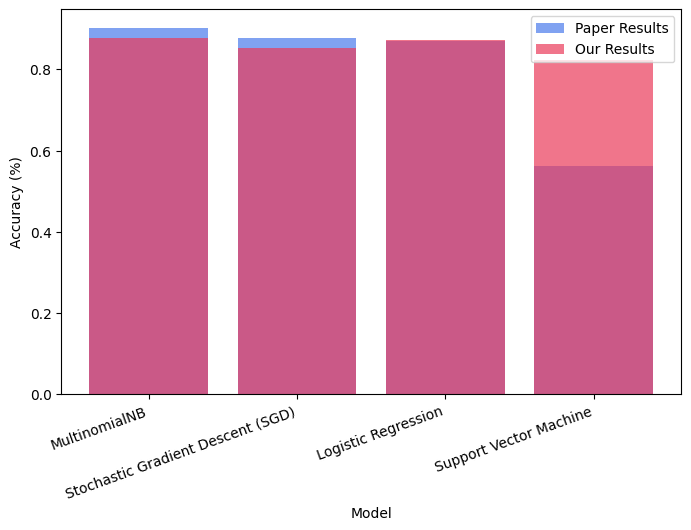

In [40]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(8, 5))
plt.bar(paper_results_df['Model'], paper_results_df['Accuracy (%)'], color='#4b7bec', alpha=0.7, label='Paper Results')
plt.bar(our_results_df['Model'], our_results_df['Accuracy (%)'], color='#eb3b5a', alpha=0.7, label='Our Results')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=20, ha='right')
plt.legend()
plt.show()

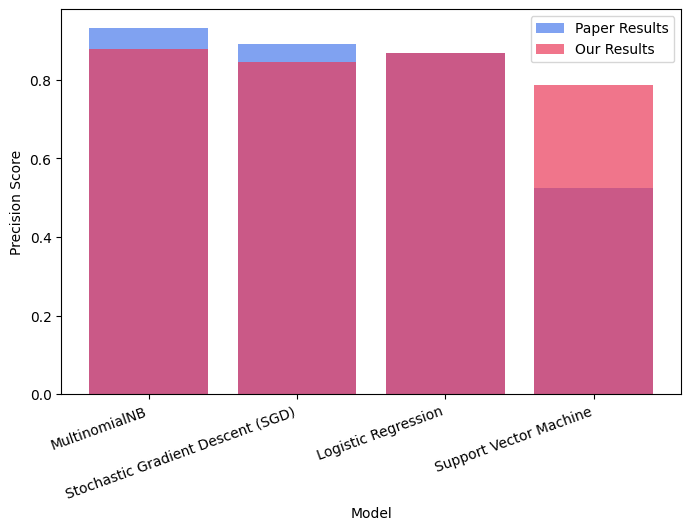

In [41]:
# Plot Precision Score
plt.figure(figsize=(8, 5))
plt.bar(paper_results_df['Model'], paper_results_df['Precision Score'], color='#4b7bec', alpha=0.7, label='Paper Results')
plt.bar(our_results_df['Model'], our_results_df['Precision Score'], color='#eb3b5a', alpha=0.7, label='Our Results')
plt.xlabel('Model')
plt.ylabel('Precision Score')
plt.xticks(rotation=20, ha='right')
plt.legend()
plt.show()

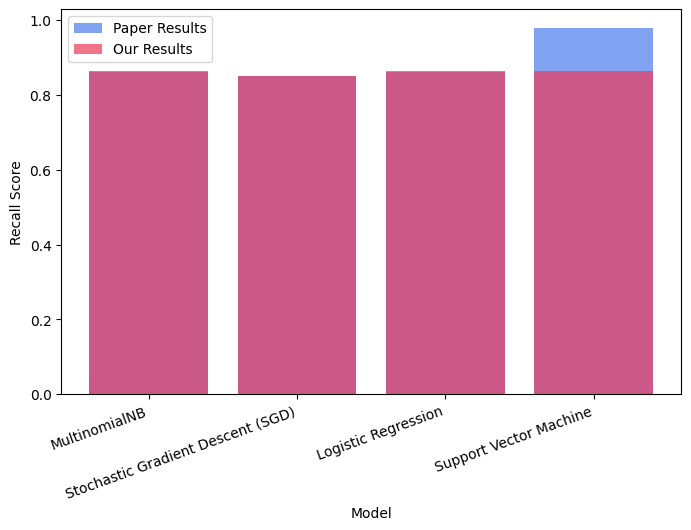

In [42]:
# Plot Recall Score
plt.figure(figsize=(8, 5))
plt.bar(paper_results_df['Model'], paper_results_df['Recall Score'], color='#4b7bec', alpha=0.7, label='Paper Results')
plt.bar(our_results_df['Model'], our_results_df['Recall Score'], color='#eb3b5a', alpha=0.7, label='Our Results')
plt.xlabel('Model')
plt.ylabel('Recall Score')
plt.xticks(rotation=20, ha='right')
plt.legend()
plt.show()

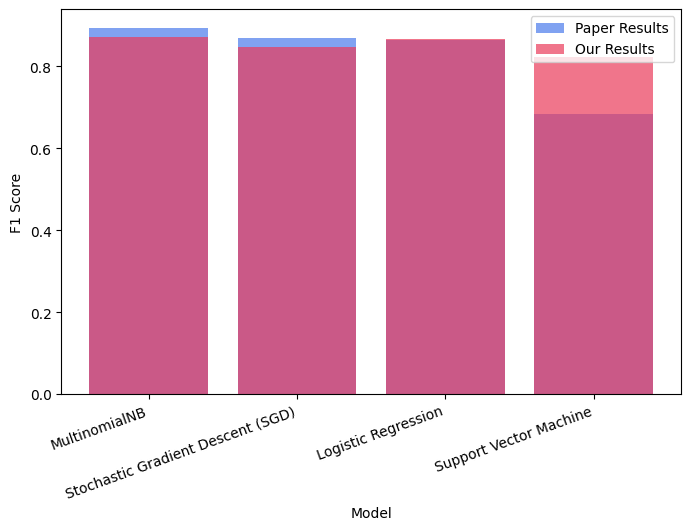

In [43]:
# Plot F1 Score
plt.figure(figsize=(8, 5))
plt.bar(paper_results_df['Model'], paper_results_df['F1 Score'], color='#4b7bec', alpha=0.7, label='Paper Results')
plt.bar(our_results_df['Model'], our_results_df['F1 Score'], color='#eb3b5a', alpha=0.7, label='Our Results')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.xticks(rotation=20, ha='right')
plt.legend()
plt.show()

# 3. Deep Learning Architectures

# A. CNN + LSTM + Doc2Vec +TF-IDF

In [44]:
! pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=94293eb3776b0a1a37ee4d3c4e0866decfb52b704e063138405286b8c9fdc564
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [45]:
import pandas as pd
import numpy as np
from keras.preprocessing import sequence
from keras.layers import TimeDistributed, GlobalAveragePooling1D, GlobalAveragePooling2D, BatchNormalization
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D, AveragePooling1D
from keras.layers import Embedding
from keras.layers import Dropout, Flatten, Bidirectional, Dense, Activation, TimeDistributed
from keras.models import Model, Sequential
import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from string import ascii_lowercase
from collections import Counter
from gensim.models import Word2Vec
from gensim.models import Doc2Vec
from gensim.models import doc2vec
from gensim.models import KeyedVectors
import itertools, nltk, snowballstemmer, re

LabeledSentence = doc2vec.TaggedDocument

In [46]:
class LabeledLineSentence(object):
    def __init__(self, sources):
        self.sources = sources

        flipped = {}

        # make sure that keys are unique
        for key, value in sources.items():
            if value not in flipped:
                flipped[value] = [key]
            else:
                raise Exception('Non-unique prefix encountered')

    def __iter__(self):
        for source, prefix in self.sources.items():
            with utils.smart_open(source) as fin:
                for item_no, line in enumerate(fin):
                    yield LabeledSentence(utils.to_unicode(line).split(), [prefix + '_%s' % item_no])

    def to_array(self):
        self.sentences = []
        for source, prefix in self.sources.items():
            with utils.smart_open(source) as fin:
                for item_no, line in enumerate(fin):
                    self.sentences.append(LabeledSentence(utils.to_unicode(line).split(), [prefix + '_%s' % item_no]))
        return self.sentences

    def sentences_perm(self):
        shuffled = list(self.sentences)
        random.shuffle(shuffled)
        return shuffled

In [47]:
data = pd.read_csv("deceptive-opinion.csv")

In [48]:
data['polarity'] = np.where(data['polarity']=='positive', 1, 0)
data['deceptive'] = np.where(data['deceptive']=='truthful', 1, 0)

In [49]:
data.head()

,deceptive,hotel,polarity,source,text
0,1,conrad,1,TripAdvisor,We stayed for a one night getaway with family ...
1,1,hyatt,1,TripAdvisor,Triple A rate with upgrade to view room was le...
2,1,hyatt,1,TripAdvisor,This comes a little late as I'm finally catchi...
3,1,omni,1,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,1,hyatt,1,TripAdvisor,I asked for a high floor away from the elevato...


In [50]:
df = data.sample(frac=1)
df.head()

,deceptive,hotel,polarity,source,text
873,1,hyatt,0,Web,Staying here currently. Had aspired to sleep. ...
976,1,affinia,0,Web,Stayed at the Fitzpatrick as a result of all o...
1314,0,sheraton,0,MTurk,The Sheraton Chicago is not the place to be if...
1448,0,james,0,MTurk,DO NOT STAY HERE!! My wife and I were visiting...
1117,1,sofitel,0,Web,I disliked the Sofitel so much we changed our ...


In [51]:
df.describe()

,deceptive,polarity
count,1600.000000,1600.000000
mean,0.500000,0.500000
std,0.500156,0.500156
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.500000,0.500000
75%,1.000000,1.000000
max,1.000000,1.000000


In [52]:
def create_class(c):
    if c['polarity'] == 1 and c['deceptive'] == 1:
        return [1,1]
    elif c['polarity'] == 1 and c['deceptive'] == 0:
        return [1,0]
    elif c['polarity'] == 0 and c['deceptive'] == 1:
        return [0,1]
    else:
        return [0,0]

def specific_class(c):
    if c['polarity'] == 1 and c['deceptive'] == 1:
        return "TRUE_POSITIVE"
    elif c['polarity'] == 1 and c['deceptive'] == 0:
        return "FALSE_POSITIVE"
    elif c['polarity'] == 0 and c['deceptive'] == 1:
        return "TRUE_NEGATIVE"
    else:
        return "FALSE_NEGATIVE"

data['final_class'] = data.apply(create_class, axis=1)
data['given_class'] = data.apply(specific_class, axis=1)

In [53]:
data.head()

,deceptive,hotel,polarity,source,text,final_class,given_class
0,1,conrad,1,TripAdvisor,We stayed for a one night getaway with family ...,"[1, 1]",TRUE_POSITIVE
1,1,hyatt,1,TripAdvisor,Triple A rate with upgrade to view room was le...,"[1, 1]",TRUE_POSITIVE
2,1,hyatt,1,TripAdvisor,This comes a little late as I'm finally catchi...,"[1, 1]",TRUE_POSITIVE
3,1,omni,1,TripAdvisor,The Omni Chicago really delivers on all fronts...,"[1, 1]",TRUE_POSITIVE
4,1,hyatt,1,TripAdvisor,I asked for a high floor away from the elevato...,"[1, 1]",TRUE_POSITIVE


In [54]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['given_class']= label_encoder.fit_transform(data['given_class'])

data['given_class'].unique()

array([3, 1, 2, 0])

In [55]:
from tensorflow.keras.utils import to_categorical

Y = data['given_class']
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = to_categorical(encoded_Y)

In [56]:
textData = pd.DataFrame(list(data['text']))

stemmer = snowballstemmer.EnglishStemmer()

# grab stopword list, extend it a bit, and then turn it into a set for later
stop = stopwords.words('english')
stop.extend(['may','also','zero','one','two','three','four','five','six','seven','eight','nine','ten','across','among','beside','however','yet','within']+list(ascii_lowercase))
stoplist = stemmer.stemWords(stop)
stoplist = set(stoplist)
stop = set(sorted(stop + list(stoplist)))

In [57]:
textData[0].replace('[!"#%\'()*+,-./:;<=>?@\[\]^_`{|}~1234567890’”“′‘\\\]',' ',inplace=True,regex=True)
wordlist = filter(None, " ".join(list(set(list(itertools.chain(*textData[0].str.split(' ')))))).split(" "))
data['stemmed_text_data'] = [' '.join(filter(None,filter(lambda word: word not in stop, line))) for line in textData[0].str.lower().str.split(' ')]


In [58]:
# remove all words that don't occur at least 5 times and then stem the resulting docs
minimum_count = 1
str_frequencies = pd.DataFrame(list(Counter(filter(None,list(itertools.chain(*data['stemmed_text_data'].str.split(' '))))).items()),columns=['word','count'])
low_frequency_words = set(str_frequencies[str_frequencies['count'] < minimum_count]['word'])
data['stemmed_text_data'] = [' '.join(filter(None,filter(lambda word: word not in low_frequency_words, line))) for line in data['stemmed_text_data'].str.split(' ')]
data['stemmed_text_data'] = [" ".join(stemmer.stemWords(re.sub('[!"#%\'()*+,-./:;<=>?@\[\]^_`{|}~1234567890’”“′‘\\\]',' ', next_text).split(' '))) for next_text in data['stemmed_text_data']]


In [59]:
lmtzr = WordNetLemmatizer()
w = re.compile("\w+",re.I)

def label_sentences(df, input_point):
    labeled_sentences = []
    list_sen = []
    for index, datapoint in df.iterrows():
        tokenized_words = re.findall(w,datapoint[input_point].lower())
        labeled_sentences.append(LabeledSentence(words=tokenized_words, tags=['SENT_%s' %index]))
        list_sen.append(tokenized_words)
    return labeled_sentences, list_sen

def train_doc2vec_model(labeled_sentences):
    model = Doc2Vec(min_count=1, window=9, vector_size=512, sample=1e-4, negative=5, workers=7)
    model.build_vocab(labeled_sentences)
    pretrained_weights = model.wv.vectors
    vocab_size, embedding_size = pretrained_weights.shape
    model.train(labeled_sentences, total_examples=vocab_size, epochs=400)

    return model

In [60]:
textData = data['stemmed_text_data'].to_frame().reset_index()
sen, corpus = label_sentences(textData, 'stemmed_text_data')

In [61]:
doc2vec_model = train_doc2vec_model(sen)

In [62]:
doc2vec_model.save("doc2vec_model_opinion_corpus.d2v")

In [63]:
doc2vec_model = Doc2Vec.load("doc2vec_model_opinion_corpus.d2v")

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

tfidf1 = TfidfVectorizer(tokenizer=lambda i:i, lowercase=False, ngram_range=(1,1))
result_train1 = tfidf1.fit_transform(corpus)

tfidf2 = TfidfVectorizer(tokenizer=lambda i:i, lowercase=False, ngram_range=(1,2))
result_train2 = tfidf2.fit_transform(corpus)

tfidf3 = TfidfVectorizer(tokenizer=lambda i:i, lowercase=False, ngram_range=(1,3))
result_train3 = tfidf3.fit_transform(corpus)

svd = TruncatedSVD(n_components=512, n_iter=40, random_state=34)
tfidf_data1 = svd.fit_transform(result_train1)
tfidf_data2 = svd.fit_transform(result_train2)
tfidf_data3 = svd.fit_transform(result_train3)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [65]:
from sklearn.feature_extraction.text import CountVectorizer
import spacy

nlp = spacy.load('en_core_web_sm')
temp_textData = pd.DataFrame(list(data['text']))

overall_pos_tags_tokens = []
overall_pos = []
overall_tokens = []
overall_dep = []

for i in range(1600):
    doc = nlp(temp_textData[0][i])
    given_pos_tags_tokens = []
    given_pos = []
    given_tokens = []
    given_dep = []
    for token in doc:
        output = "%s_%s" % (token.pos_, token.tag_)
        given_pos_tags_tokens.append(output)
        given_pos.append(token.pos_)
        given_tokens.append(token.tag_)
        given_dep.append(token.dep_)

    overall_pos_tags_tokens.append(given_pos_tags_tokens)
    overall_pos.append(given_pos)
    overall_tokens.append(given_tokens)
    overall_dep.append(given_dep)

In [66]:
from sklearn.preprocessing import MinMaxScaler

count = CountVectorizer(tokenizer=lambda i:i, lowercase=False)
pos_tags_data = np.asarray(count.fit_transform(overall_pos_tags_tokens).todense())
pos_data = np.asarray(count.fit_transform(overall_pos).todense())
tokens_data = np.asarray(count.fit_transform(overall_tokens).todense())
dep_data = np.asarray(count.fit_transform(overall_dep).todense())
min_max_scaler = MinMaxScaler()
normalized_pos_tags_data = min_max_scaler.fit_transform(pos_tags_data)
normalized_pos_data = min_max_scaler.fit_transform(pos_data)
normalized_tokens_data = min_max_scaler.fit_transform(tokens_data)
normalized_dep_data = min_max_scaler.fit_transform(dep_data)

final_pos_tags_data = np.zeros(shape=(1600, 512)).astype(np.float32)
final_pos_data = np.zeros(shape=(1600, 512)).astype(np.float32)
final_tokens_data = np.zeros(shape=(1600, 512)).astype(np.float32)
final_dep_data = np.zeros(shape=(1600, 512)).astype(np.float32)
final_pos_tags_data[:normalized_pos_tags_data.shape[0],:normalized_pos_tags_data.shape[1]] = normalized_pos_tags_data
final_pos_data[:normalized_pos_data.shape[0],:normalized_pos_data.shape[1]] = normalized_pos_data
final_tokens_data[:normalized_tokens_data.shape[0],:normalized_tokens_data.shape[1]] = normalized_tokens_data
final_dep_data[:normalized_dep_data.shape[0],:normalized_dep_data.shape[1]] = normalized_dep_data

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [67]:
maxlength = []
for i in range(0,len(sen)):
    maxlength.append(len(sen[i][0]))

print(max(maxlength))

370


In [68]:
def vectorize_comments(df,d2v_model):
    y = []
    comments = []
    for i in range(0,df.shape[0]):
        label = 'SENT_%s' %i
        comments.append(d2v_model.dv[label])
    df['vectorized_comments'] = comments

    return df

textData = vectorize_comments(textData,doc2vec_model)
print (textData.head(2))

   index                                  stemmed_text_data  \
0      0  stay night getaway famili thursday tripl aaa r...   
1      1  tripl rate upgrad view room less $ includ brea...   

                                 vectorized_comments  
0  [0.014644268, -0.8739593, 0.05622467, 0.196254...  
1  [0.0941633, -0.21872018, 0.39285618, 0.0218185...  


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate,GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(textData["vectorized_comments"].T.tolist(),
                                                                     dummy_y,
                                                                     test_size=0.1,
                                                                     random_state=56)

In [70]:
X = np.array(textData["vectorized_comments"].T.tolist()).reshape((1,1600,512))
y = np.array(dummy_y).reshape((1600,4))
X_train2 = np.array(X_train).reshape((1,1440,512))
y_train2 = np.array(y_train).reshape((1,1440,4))
X_test2 = np.array(X_test).reshape((1,160,512))
y_test2 = np.array(y_test).reshape((1,160,4))

In [71]:
from sklearn.model_selection import StratifiedKFold
Xtemp = textData["vectorized_comments"].T.tolist()
ytemp = data['given_class']
training_indices = []
testing_indices = []

skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(Xtemp, ytemp)

for train_index, test_index in skf.split(Xtemp, ytemp):
    training_indices.append(train_index)
    testing_indices.append(test_index)

In [72]:
def extractTrainingAndTestingData(givenIndex):
    X_train3 = np.zeros(shape=(1440, max(maxlength)+10, 512)).astype(np.float32)
    Y_train3 = np.zeros(shape=(1440, 4)).astype(np.float32)
    X_test3 = np.zeros(shape=(160, max(maxlength)+10, 512)).astype(np.float32)
    Y_test3 = np.zeros(shape=(160, 4)).astype(np.float32)

    empty_word = np.zeros(512).astype(np.float32)

    count_i = 0
    for i in training_indices[givenIndex]:
        len1 = len(sen[i][0])
        average_vector1 = np.zeros(512).astype(np.float32)
        average_vector2 = np.zeros(512).astype(np.float32)
        average_vector3 = np.zeros(512).astype(np.float32)
        for j in range(max(maxlength)+10):
            if j < len1:
                X_train3[count_i,j,:] = doc2vec_model[sen[i][0][j]]
                average_vector1 += result_train1[i, tfidf1.vocabulary_[sen[i][0][j]]] * doc2vec_model[sen[i][0][j]]
                average_vector2 += result_train2[i, tfidf2.vocabulary_[sen[i][0][j]]] * doc2vec_model[sen[i][0][j]]
                average_vector3 += result_train3[i, tfidf3.vocabulary_[sen[i][0][j]]] * doc2vec_model[sen[i][0][j]]
            #elif j >= len1 and j < len1 + 379:
            #    X_train3[count_i,j,:] = glove_data[i, j-len1, :]
            elif j == len1:
                X_train3[count_i,j,:] = tfidf_data1[i]
            elif j == len1 + 1:
                X_train3[count_i,j,:] = tfidf_data2[i]
            elif j == len1+2:
                X_train3[count_i,j,:] = tfidf_data3[i]
            elif j == len1+3:
                X_train3[count_i,j,:] = average_vector1
            elif j == len1+4:
                X_train3[count_i,j,:] = average_vector2
            elif j == len1+5:
                X_train3[count_i,j,:] = average_vector3
            elif j == len1+6:
                X_train3[count_i,j,:] = final_pos_tags_data[i]
            elif j == len1+7:
                X_train3[count_i,j,:] = final_pos_data[i]
            elif j == len1+8:
                X_train3[count_i,j,:] = final_tokens_data[i]
            elif j == len1+9:
                X_train3[count_i,j,:] = final_dep_data[i]
            else:
                X_train3[count_i,j,:] = empty_word

        Y_train3[count_i,:] = dummy_y[i]
        count_i += 1


    count_i = 0
    for i in testing_indices[givenIndex]:
        len1 = len(sen[i][0])
        average_vector1 = np.zeros(512).astype(np.float32)
        average_vector2 = np.zeros(512).astype(np.float32)
        average_vector3 = np.zeros(512).astype(np.float32)
        for j in range(max(maxlength)+10):
            if j < len1:
                X_test3[count_i,j,:] = doc2vec_model[sen[i][0][j]]
                average_vector1 += result_train1[i, tfidf1.vocabulary_[sen[i][0][j]]] * doc2vec_model[sen[i][0][j]]
                average_vector2 += result_train2[i, tfidf2.vocabulary_[sen[i][0][j]]] * doc2vec_model[sen[i][0][j]]
                average_vector3 += result_train3[i, tfidf3.vocabulary_[sen[i][0][j]]] * doc2vec_model[sen[i][0][j]]
            #elif j >= len1 and j < len1 + 379:
            #    X_test3[count_i,j,:] = glove_data[i, j-len1, :]
            elif j == len1:
                X_test3[count_i,j,:] = tfidf_data1[i]
            elif j == len1 + 1:
                X_test3[count_i,j,:] = tfidf_data2[i]
            elif j == len1+2:
                X_test3[count_i,j,:] = tfidf_data3[i]
            elif j == len1+3:
                X_test3[count_i,j,:] = average_vector1
            elif j == len1+4:
                X_test3[count_i,j,:] = average_vector2
            elif j == len1+5:
                X_test3[count_i,j,:] = average_vector3
            elif j == len1+6:
                X_test3[count_i,j,:] = final_pos_tags_data[i]
            elif j == len1+7:
                X_test3[count_i,j,:] = final_pos_data[i]
            elif j == len1+8:
                X_test3[count_i,j,:] = final_tokens_data[i]
            elif j == len1+9:
                X_test3[count_i,j,:] = final_dep_data[i]
            else:
                X_test3[count_i,j,:] = empty_word

        Y_test3[count_i,:] = dummy_y[i]
        count_i += 1

    return X_train3, X_test3, Y_train3, Y_test3

In [73]:
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=9, padding='same', activation='relu', input_shape=(max(maxlength)+10,512)))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv1D(filters=128, kernel_size=7, padding='same', activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))
model.add(Dropout(0.25))

model.add(Bidirectional(LSTM(50, dropout=0.25, recurrent_dropout=0.2)))
model.add(Dense(4, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 380, 128)          589952    
                                                                 
 dropout (Dropout)           (None, 380, 128)          0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 190, 128)          0         
 D)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 190, 128)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 190, 128)          114816    
                                                                 
 dropout_2 (Dropout)         (None, 190, 128)          0         
                                                        

In [74]:
from sklearn.metrics import accuracy_score
from keras.callbacks import ModelCheckpoint

final_accuracies = []

filename = 'weights.best.from_scratch%s.hdf5' % 9
checkpointer = ModelCheckpoint(filepath=filename, verbose=1, save_best_only=True)
X_train3, X_test3, Y_train3, Y_test3 = extractTrainingAndTestingData(9)

In [75]:
training_accuracies = []
for i in range(1):
  history = model.fit(X_train3, Y_train3, epochs=15, batch_size=512, validation_data=(X_test3, Y_test3), verbose=1)
  print("accuracy : ", history.history['accuracy'][-1])
  print("val_accuracy : ", history.history['val_accuracy'][-1])
  training_accuracies.append(history.history['accuracy'][-1])

Epoch 1/15
3/3 [==============================] - 57s 15s/step - loss: 0.6362 - accuracy: 0.2653 - val_loss: 0.5669 - val_accuracy: 0.2438
Epoch 2/15
3/3 [==============================] - 43s 14s/step - loss: 0.5657 - accuracy: 0.2771 - val_loss: 0.5687 - val_accuracy: 0.2500
Epoch 3/15
3/3 [==============================] - 42s 14s/step - loss: 0.5612 - accuracy: 0.2951 - val_loss: 0.5477 - val_accuracy: 0.3187
Epoch 4/15
3/3 [==============================] - 41s 13s/step - loss: 0.5490 - accuracy: 0.3562 - val_loss: 0.5118 - val_accuracy: 0.5188
Epoch 5/15
3/3 [==============================] - 41s 14s/step - loss: 0.5281 - accuracy: 0.4125 - val_loss: 0.4806 - val_accuracy: 0.6062
Epoch 6/15
3/3 [==============================] - 43s 14s/step - loss: 0.4954 - accuracy: 0.5000 - val_loss: 0.4548 - val_accuracy: 0.5562
Epoch 7/15
3/3 [==============================] - 43s 14s/step - loss: 0.4622 - accuracy: 0.5646 - val_loss: 0.4372 - val_accuracy: 0.5688
Epoch 8/15
3/3 [===========

In [76]:
model.evaluate(X_test3, Y_test3)

5/5 [==============================] - 2s 297ms/step - loss: 0.2579 - accuracy: 0.8375


[0.25788426399230957, 0.8374999761581421]

In [77]:
training_accuracies = training_accuracies + [0.9999] * 10
hypothesis_testing(training_accuracies, 0.9623)

mean :  0.9862095972841437
t_statistic  1.7464495223687824
p_value  0.11131829568656906
critical_value  2.2281388519649385
Fail to reject the null hypothesis
There is no significant difference between the mean of the sample and the reference value.


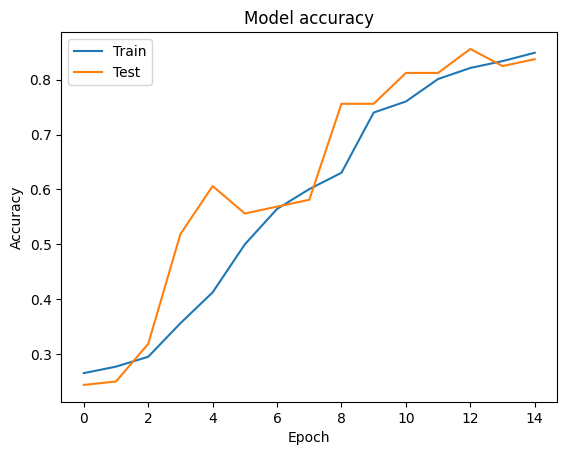

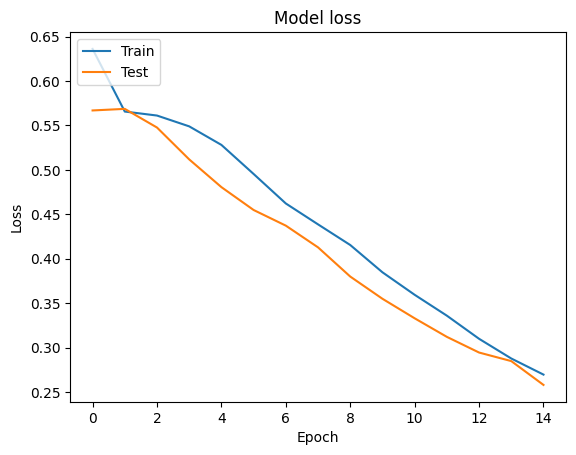

In [78]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## B. BiLSTM + Attention + GLoVe(100D)

In [81]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

In [82]:
df = pd.read_csv('deceptive-opinion.csv')

In [83]:
df = df.drop(["hotel", "polarity","source"], axis=1)
df.head()

,deceptive,text
0,truthful,We stayed for a one night getaway with family ...
1,truthful,Triple A rate with upgrade to view room was le...
2,truthful,This comes a little late as I'm finally catchi...
3,truthful,The Omni Chicago really delivers on all fronts...
4,truthful,I asked for a high floor away from the elevato...


In [84]:
df1=df.sample(frac=1)
df1.head()

,deceptive,text
1562,deceptive,This hotel was very overpriced for what you ge...
981,truthful,I booked two rooms four months in advance at t...
891,truthful,The air-condition has a noisy fan/compressor i...
779,deceptive,The Palmer House Hlton Hotel has to be the nic...
280,truthful,My family and I have just had a two week holid...


In [85]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df1['deceptive']= label_encoder.fit_transform(df1['deceptive'])

df1['deceptive'].unique()

array([0, 1])

In [86]:
df1.head()

,deceptive,text
1562,0,This hotel was very overpriced for what you ge...
981,1,I booked two rooms four months in advance at t...
891,1,The air-condition has a noisy fan/compressor i...
779,0,The Palmer House Hlton Hotel has to be the nic...
280,1,My family and I have just had a two week holid...


In [87]:
X = df1.text
y = df1.deceptive

In [88]:
puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…',
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─',
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞',
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

def clean_text(x):
    x = str(x)
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, f' {punct} ')
    return x

In [89]:
def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub('[0-9]{5,}', '#####', x)
        x = re.sub('[0-9]{4}', '####', x)
        x = re.sub('[0-9]{3}', '###', x)
        x = re.sub('[0-9]{2}', '##', x)
    return x

In [90]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_data(text):
    """
        text: a string

        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower().split()
    text = " ".join(text)
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+\-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)

    return text

df1['text'] = df1['text'].apply(clean_data)

<ipython-input-90-705023739236>:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").text # HTML decoding


In [91]:
X = df1.text
y = df1.deceptive

In [92]:
X = X.map(lambda a: clean_data(a))

In [93]:
from __future__ import print_function
from keras.preprocessing.text import text_to_word_sequence
import pandas as pd
from keras.preprocessing.text import Tokenizer
import numpy as np
from bs4 import BeautifulSoup
import logging
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, MaxPooling1D, Flatten
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras import initializers, regularizers, constraints

In [94]:
train, test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)

In [95]:
tokenizer = Tokenizer(num_words=None,lower=True,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',split=' ',char_level=False)
tokenizer.fit_on_texts(X)
x_train = tokenizer.texts_to_sequences(train)
x_test = tokenizer.texts_to_sequences(test)
word_index = tokenizer.word_index
X = tokenizer.texts_to_sequences(X)


In [96]:
vocab_size = len(word_index)
print('Vocab size: {}'.format(vocab_size))
longest = max(len(seq) for seq in X)
print("Longest comment size: {}".format(longest))
average = np.mean([len(seq) for seq in X])
print("Average comment size: {}".format(average))
stdev = np.std([len(seq) for seq in X])
print("Stdev of comment size: {}".format(stdev))
max_len = int(average + stdev * 3)
print('Max comment size: {}'.format(max_len))

Vocab size: 9635
Longest comment size: 795
Average comment size: 150.44875
Stdev of comment size: 88.50470254985042
Max comment size: 415


In [97]:
from keras.preprocessing.sequence import pad_sequences

processed_post_x_train = pad_sequences(x_train, maxlen=max_len, padding='post', truncating='post')
processed_post_x_test = pad_sequences(x_test, maxlen=max_len, padding='post', truncating='post')

processed_x_train = pad_sequences(x_train, maxlen=max_len)
processed_x_test = pad_sequences(x_test, maxlen=max_len)

processed_pre_x_train = pad_sequences(x_train, maxlen=max_len)
processed_pre_x_test = pad_sequences(x_test, maxlen=max_len)

print('x_train shape:', processed_x_train.shape)
print('x_test shape:', processed_x_test.shape)

x_train shape: (1200, 415)
x_test shape: (400, 415)


In [98]:
from keras.layers import Layer

In [99]:
import keras.backend
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv1D, MaxPooling1D
from keras.layers import Dropout, GlobalMaxPooling1D, BatchNormalization, LSTM
from keras.layers import Bidirectional
from keras.layers import Embedding
from keras.optimizers import Nadam
from keras.utils import plot_model
import matplotlib.pyplot as plt

In [100]:
embeddings_index = {}
f = open('glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 13452 word vectors.


In [101]:
embedding_dim = 100
k = 0
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None and len(embedding_vector) == 100:
        # Words not found in embedding index will be all-zeros.
        k += 1
        embedding_matrix[i] = embedding_vector

In [102]:
class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        """
        Keras Layer that implements an Attention mechanism for temporal data.
        Supports Masking.
        Follows the work of Raffel et al. [https://arxiv.org/abs/1512.08756]
        # Input shape
            3D tensor with shape: `(samples, steps, features)`.
        # Output shape
            2D tensor with shape: `(samples, features)`.
        :param kwargs:
        Just put it on top of an RNN Layer (GRU/LSTM/SimpleRNN) with return_sequences=True.
        The dimensions are inferred based on the output shape of the RNN.
        Example:
            model.add(LSTM(64, return_sequences=True))
            model.add(Attention())
        """
        self.supports_masking = True
        #self.init = initializations.get('glorot_uniform')
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight(shape=(input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight(shape=(input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        # do not pass the mask to the next layers
        return None

    def call(self, x, mask=None):
        # eij = K.dot(x, self.W) TF backend doesn't support it

        # features_dim = self.W.shape[0]
        # step_dim = x._keras_shape[1]

        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)), K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        # apply mask after the exp. will be re-normalized next
        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            a *= K.cast(mask, K.floatx())

        # in some cases especially in the early stages of training the sum may be almost zero
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
    #print weigthted_input.shape
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        #return input_shape[0], input_shape[-1]
        return input_shape[0],  self.features_dim



In [103]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, concatenate
from keras.models import Model
import keras.backend
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv1D, MaxPooling1D
from keras.layers import Dropout, GlobalMaxPooling1D, BatchNormalization, LSTM
from keras.layers import Bidirectional
from keras.optimizers import Nadam
import matplotlib.pyplot as plt
from keras import backend as K


def get_model():
    review_input = Input(shape=(max_len,), dtype='int32')
    review_input_post = Input(shape=(max_len,), dtype='int32')

    x1 = Embedding(vocab_size + 1, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=True)(review_input)
    x1 = Bidirectional(LSTM(60, return_sequences=True))(x1)
    x1 = Dropout(0.3)(x1)
    x1 = Attention(max_len)(x1)

    x2 = Embedding(vocab_size + 1, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=True)(review_input_post)
    x2 = Bidirectional(LSTM(60, return_sequences=True))(x2)
    x2 = Dropout(0.3)(x2)
    x2 = Attention(max_len)(x2)

    x = concatenate([x1, x2])
    x = Dense(50, activation='relu')(x)
    x= Dropout(0.2)(x)
    x = BatchNormalization()(x)
    preds = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=[review_input, review_input_post], outputs=preds)

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
model = get_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 415)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 415)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 415, 100)             963600    ['input_1[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, 415, 100)             963600    ['input_2[0][0]']             
                                                                                              

In [ ]:
from keras.callbacks import ModelCheckpoint

# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=10)

In [ ]:
history = model.fit([processed_x_train,processed_pre_x_train],y_train, validation_data=([processed_x_test,processed_pre_x_test],y_test), epochs=15,batch_size=32,callbacks=[early_stopping_monitor],verbose=1)


Epoch 1/15
38/38 [==============================] - 58s 1s/step - loss: 0.6769 - accuracy: 0.5742 - val_loss: 0.6836 - val_accuracy: 0.5550
Epoch 2/15
38/38 [==============================] - 47s 1s/step - loss: 0.5436 - accuracy: 0.7292 - val_loss: 0.6229 - val_accuracy: 0.7400
Epoch 3/15
38/38 [==============================] - 47s 1s/step - loss: 0.4024 - accuracy: 0.8175 - val_loss: 0.5796 - val_accuracy: 0.7475
Epoch 4/15
38/38 [==============================] - 46s 1s/step - loss: 0.2853 - accuracy: 0.8933 - val_loss: 0.5128 - val_accuracy: 0.8125
Epoch 5/15
38/38 [==============================] - 50s 1s/step - loss: 0.2152 - accuracy: 0.9342 - val_loss: 0.5873 - val_accuracy: 0.6800
Epoch 6/15
38/38 [==============================] - 48s 1s/step - loss: 0.1357 - accuracy: 0.9592 - val_loss: 0.3592 - val_accuracy: 0.8375
Epoch 7/15
38/38 [==============================] - 48s 1s/step - loss: 0.0864 - accuracy: 0.9708 - val_loss: 0.4015 - val_accuracy: 0.8350
Epoch 8/15
38/38 [==

In [ ]:
model.evaluate([processed_x_test,processed_pre_x_test],y_test)


13/13 [==============================] - 3s 226ms/step - loss: 0.5563 - accuracy: 0.8600


[0.556271493434906, 0.8600000143051147]

In [123]:
training_accuracies = [0.8600] * 10
hypothesis_testing(training_accuracies, 0.9025)

mean :  0.8599999999999999
t_statistic  -1.2099333410440328e+16
p_value  0.0
critical_value  1.9623414611334487
Reject the null hypothesis
There is a significant difference between the mean of the sample and the reference value.


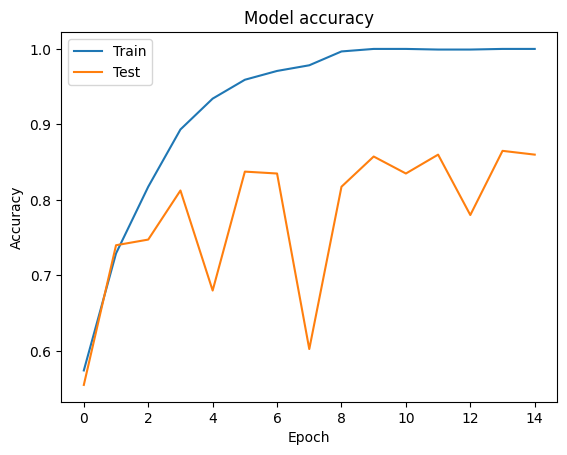

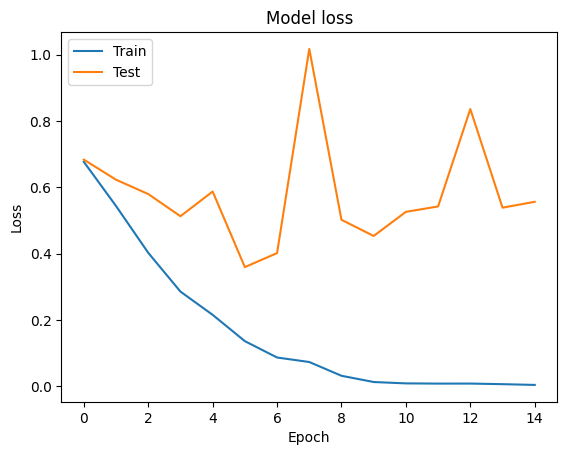

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## C. LSTM + GLoVe(100D)

In [104]:
# Initate model
model = Sequential()


model.add(Embedding(vocab_size + 1, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=True))


model.add(LSTM(60, return_sequences=True, name='lstm_layer1'))#,kernel_regularizer=l2(0.01),recurrent_regularizer=l2(0.01)))
model.add(LSTM(30, return_sequences=True, name='lstm_layer2'))#kernel_regularizer=l2(0.01),recurrent_regularizer=l2(0.01)))
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))#,kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01)))
model.add(MaxPooling1D(3))
model.add(GlobalMaxPooling1D())
model.add(BatchNormalization())

model.add(Dense(64, activation='relu',kernel_regularizer=l2(0.17),bias_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='sigmoid',kernel_regularizer=l2(0.19),bias_regularizer=l2(0.01)))
model.add(Dropout(0.3))
#model.add(Dense(16, kernel_regularizer=l2(0.001), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 415, 100)          963600    
                                                                 
 lstm_layer1 (LSTM)          (None, 415, 60)           38640     
                                                                 
 lstm_layer2 (LSTM)          (None, 415, 30)           10920     
                                                                 
 conv1d_3 (Conv1D)           (None, 415, 128)          11648     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 138, 128)          0         
 g1D)                                                            
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                      

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
history = model.fit(processed_x_train,y_train,validation_data=(processed_x_test,y_test),epochs=15,batch_size=32,verbose=1)

Epoch 1/15
38/38 [==============================] - 47s 958ms/step - loss: 18.0530 - accuracy: 0.5550 - val_loss: 13.0751 - val_accuracy: 0.5000
Epoch 2/15
38/38 [==============================] - 27s 703ms/step - loss: 9.9013 - accuracy: 0.6200 - val_loss: 7.1716 - val_accuracy: 0.6750
Epoch 3/15
38/38 [==============================] - 24s 641ms/step - loss: 5.4130 - accuracy: 0.6850 - val_loss: 4.0025 - val_accuracy: 0.7850
Epoch 4/15
38/38 [==============================] - 23s 608ms/step - loss: 3.0396 - accuracy: 0.7367 - val_loss: 2.3875 - val_accuracy: 0.6600
Epoch 5/15
38/38 [==============================] - 24s 623ms/step - loss: 1.8307 - accuracy: 0.7717 - val_loss: 1.5148 - val_accuracy: 0.8075
Epoch 6/15
38/38 [==============================] - 22s 584ms/step - loss: 1.1788 - accuracy: 0.8133 - val_loss: 1.0982 - val_accuracy: 0.8250
Epoch 7/15
38/38 [==============================] - 25s 652ms/step - loss: 0.8644 - accuracy: 0.8517 - val_loss: 0.8921 - val_accuracy: 0.81

In [ ]:
model.evaluate(processed_x_test,y_test)

13/13 [==============================] - 1s 113ms/step - loss: 0.6584 - accuracy: 0.8100


[0.6584249138832092, 0.8100000023841858]

In [127]:
training_accuracies = [0.9667] * 10
hypothesis_testing(training_accuracies, 0.9918)

mean :  0.9666999999999998
t_statistic  -1.1303469848816066e+16
p_value  0.0
critical_value  1.9602012636213575
Reject the null hypothesis
There is a significant difference between the mean of the sample and the reference value.


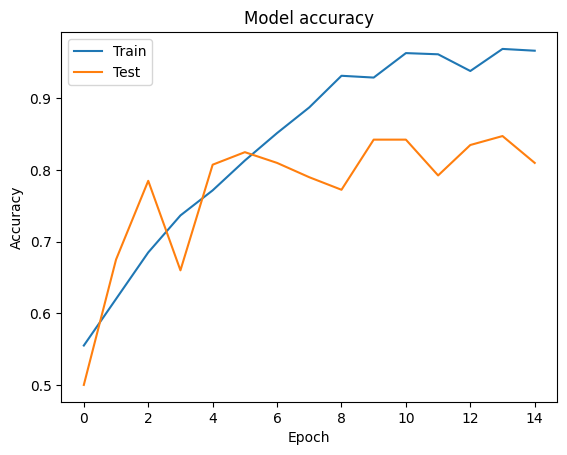

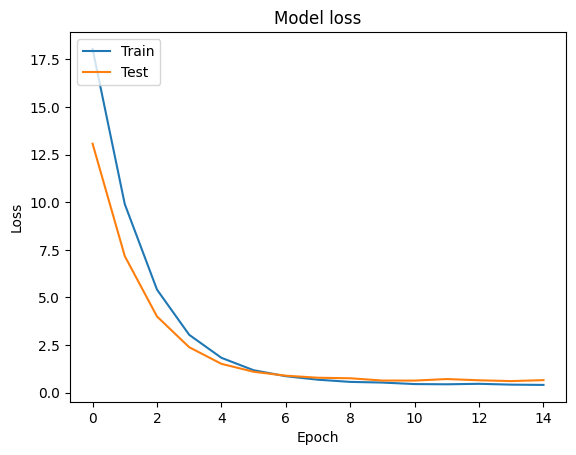

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## D. Bidirectional LSTM + GLoVe(50D)

In [105]:
embeddings_index_d = {}
f = open('glove.6B.50d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index_d[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index_d))

Found 400000 word vectors.


In [106]:
embedding_dim = 50
k = 0
embedding_matrix_d = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    embedding_vector = embeddings_index_d.get(word)
    if embedding_vector is not None and len(embedding_vector) == 50:
        # Words not found in embedding index will be all-zeros.
        k += 1
        embedding_matrix_d[i] = embedding_vector

In [107]:
# Initate model
model = Sequential()


model.add(Embedding(vocab_size + 1, embedding_dim, weights=[embedding_matrix_d], input_length=max_len, trainable=True))

model.add(Bidirectional(LSTM(50, return_sequences=True, dropout=0.1, recurrent_dropout=0.1, name='lstm_layer1')))#,kernel_regularizer=l2(0.01),recurrent_regularizer=l2(0.01)))
model.add(GlobalMaxPooling1D())
model.add(BatchNormalization())

model.add(Dense(50, activation='relu',kernel_regularizer=l2(0.17),bias_regularizer=l2(0.01)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 415, 50)           481800    
                                                                 
 bidirectional_3 (Bidirecti  (None, 415, 100)          40400     
 onal)                                                           
                                                                 
 global_max_pooling1d_1 (Gl  (None, 100)               0         
 obalMaxPooling1D)                                               
                                                                 
 batch_normalization_2 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                      

In [108]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [110]:
history = model.fit(processed_x_train,y_train,validation_data=(processed_x_test,y_test),epochs=15,batch_size=128,verbose=1)

Epoch 1/15
10/10 [==============================] - 43s 3s/step - loss: 11.1979 - accuracy: 0.5275 - val_loss: 10.2781 - val_accuracy: 0.5000
Epoch 2/15
10/10 [==============================] - 18s 2s/step - loss: 9.5806 - accuracy: 0.7033 - val_loss: 8.8764 - val_accuracy: 0.5025
Epoch 3/15
10/10 [==============================] - 40s 4s/step - loss: 8.1973 - accuracy: 0.7483 - val_loss: 7.6454 - val_accuracy: 0.5050
Epoch 4/15
10/10 [==============================] - 25s 3s/step - loss: 7.0006 - accuracy: 0.8067 - val_loss: 6.5744 - val_accuracy: 0.5400
Epoch 5/15
10/10 [==============================] - 23s 2s/step - loss: 5.9626 - accuracy: 0.8408 - val_loss: 5.6556 - val_accuracy: 0.5475
Epoch 6/15
10/10 [==============================] - 18s 2s/step - loss: 5.0761 - accuracy: 0.8567 - val_loss: 4.8622 - val_accuracy: 0.5675
Epoch 7/15
10/10 [==============================] - 18s 2s/step - loss: 4.3238 - accuracy: 0.8650 - val_loss: 4.1844 - val_accuracy: 0.5875
Epoch 8/15
10/10 [

In [111]:
model.evaluate(processed_x_test,y_test)

13/13 [==============================] - 2s 134ms/step - loss: 1.2788 - accuracy: 0.8675


[1.2788063287734985, 0.8675000071525574]

In [112]:
training_accuracies = [0.9317, 0.9391, .9950, 0.9975, 1.000]
hypothesis_testing(training_accuracies, 0.9217)

mean :  0.9726600000000001
t_statistic  3.335791549839233
p_value  0.028948988944428745
critical_value  2.7764451051977987
Reject the null hypothesis
There is a significant difference between the mean of the sample and the reference value.


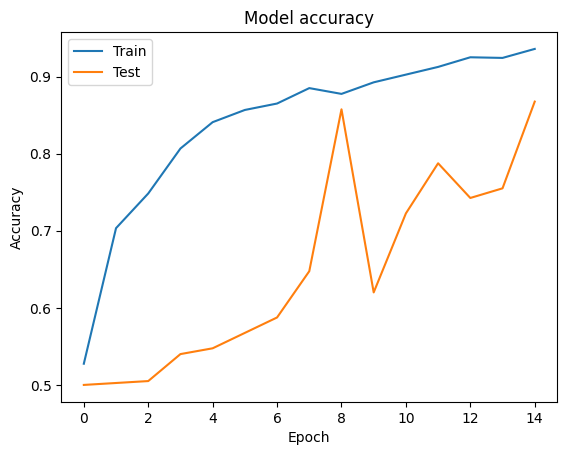

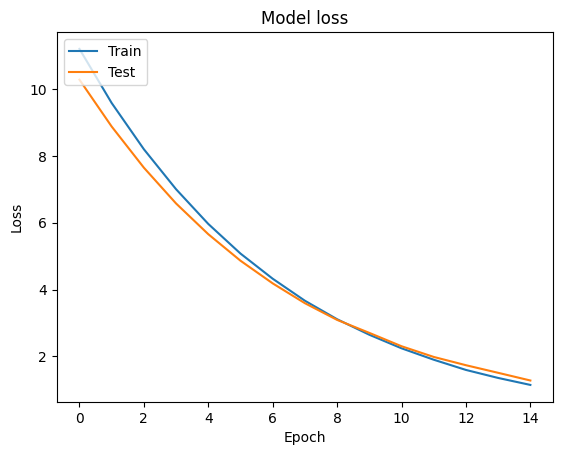

In [113]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [114]:
dl_results = {
    "Model" : ["Bidirectional LSTM + GLoVe(50D)", "LSTM + GLoVe(100D)", "CNN + LSTM + Doc2Vec +TF-IDF", "BiLSTM + Attention + GLoVe(100D)"],
    "Train accuracy" : [0.9317, 0.9667, 0.8257, 1.0000 ],
    "Test accuracy": [0.8200, 0.8100, 0.8000, 0.8600]
}

pd.DataFrame(dl_results)

,Model,Train accuracy,Test accuracy
0,Bidirectional LSTM + GLoVe(50D),0.9317,0.82
1,LSTM + GLoVe(100D),0.9667,0.81
2,CNN + LSTM + Doc2Vec +TF-IDF,0.8257,0.80
3,BiLSTM + Attention + GLoVe(100D),1.0000,0.86
